In [99]:
%pip install numpy
%pip install scipy
%pip install matplotlib
%pip install scikit-learn
%pip install pandas

In [100]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as mplot
import pandas as pd
from sklearn import preprocessing as prep
from sklearn.ensemble import IsolationForest

In [32]:
sensor_df = pd.read_csv("sensor.csv")
sensor_df.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [40]:
#sensor_df = sensor_df.drop(columns=["sensor_15"])
sensor_df.isna().any()
sensor_df.loc[:, sensor_df.isna().any()] = sensor_df.loc[:, sensor_df.isna().any()].ffill()
sensor_df.loc[:, sensor_df.isna().any()] = sensor_df.loc[:, sensor_df.isna().any()].bfill()

In [41]:
sensor_df.describe()

,Unnamed: 0,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
count,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,...,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000
mean,110159.500000,2.281158,47.597254,50.867093,43.752337,590.664106,73.394872,13.209623,15.498316,14.872618,...,35.453143,43.879263,42.656415,43.094291,48.017908,44.340380,150.886798,57.119821,468.549868,258.266994
std,63601.049991,0.585413,3.302558,3.667314,2.418979,144.042134,17.301042,2.901954,3.152707,2.956980,...,10.258958,11.043951,11.575867,12.836955,15.640575,10.441987,82.243950,19.143759,393.067670,228.890462
min,0.000000,0.000000,0.000000,33.159720,31.640620,2.798032,0.000000,0.014468,0.000000,0.028935,...,22.135416,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370,27.488426,27.777779
25%,55079.750000,2.419155,46.310760,50.390620,42.838539,626.620400,69.976258,13.317420,15.856480,15.147570,...,32.812500,39.583330,36.747684,36.747684,40.509258,39.062500,83.912030,47.743060,182.581000,180.555600
50%,110159.500000,2.455556,48.133680,51.649300,44.227428,632.638916,75.576430,13.628470,16.167530,15.451390,...,35.156250,42.968750,40.509260,40.219910,44.849540,42.245370,138.020800,52.662040,222.511600,199.942100
75%,165239.250000,2.499826,49.479160,52.777770,45.312500,637.615723,80.911770,14.539930,16.427950,15.697340,...,36.979164,46.614580,45.138890,44.849540,51.215280,46.585650,208.333300,60.763890,1000.000000,223.090300
max,220319.000000,2.549016,56.727430,56.032990,48.220490,800.000000,99.999880,22.251160,23.596640,24.348960,...,374.218800,408.593700,1000.000000,320.312500,370.370400,303.530100,561.632000,464.409700,1000.000000,1000.000000


In [44]:
sensor_df['timestamp'] = sensor_df['timestamp'].astype('datetime64[ns]')

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


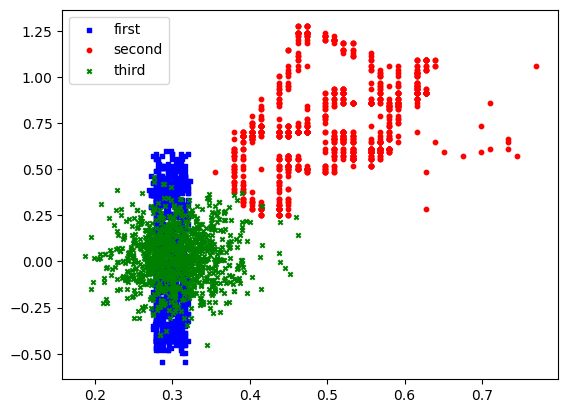

In [124]:
only_sensors_df = sensor_df[sensor_df.columns[2:-1]]
scaler = prep.StandardScaler()
fitted = scaler.fit_transform(only_sensors_df)
fitted_df = pd.DataFrame(fitted, columns=only_sensors_df.columns)

x1 = fitted_df['sensor_00']
x2 = fitted_df['sensor_01']
x3 = fitted_df['sensor_02']
x4 = fitted_df['sensor_03']
x5 = fitted_df['sensor_04']
x6 = fitted_df['sensor_05']

fig = mplot.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x1[:1000], x2[:1000], s=10, c='b', marker="s", label='first')
ax1.scatter(x3[:1000], x4[:1000], s=10, c='r', marker="o", label='second')
ax1.scatter(x5[:1000], x6[:1000], s=10, c='g', marker="x", label='third')
mplot.legend(loc='upper left')
mplot.show()

In [136]:
good_df = sensor_df[sensor_df["machine_status"] != "BROKEN"][sensor_df.columns[2:-1]]
bad_df = sensor_df[sensor_df["machine_status"] == "BROKEN"][sensor_df.columns[2:-1]]

fitted = scaler.fit_transform(good_df)
good_df = pd.DataFrame(good_df, columns=good_df.columns)

fitted = scaler.fit_transform(bad_df)
bad_df = pd.DataFrame(bad_df, columns=bad_df.columns)

iso_algo = IsolationForest(contamination="auto", random_state=100)
predictions = iso_algo.fit(good_df).predict(good_df)

In [137]:
for i in range(len(predictions)):
    if predictions[i] == 0:
        print (predictions[i])

In [138]:
pred = iso_algo.predict(bad_df)
print(pred)

[ 1  1  1 -1 -1 -1  1]


In [ ]:
broken_timestamps = sensor_df["timestamp"][sensor_df['machine_status'] == "BROKEN"].to_numpy()
timedelta_days = timedelta(hours=12)
ranges = []
for i in range(len(broken_timestamps)):
    start = pd.to_datetime(broken_timestamps[i]) - timedelta_days
    end = pd.to_datetime(broken_timestamps[i])
    r = sensor_df[(sensor_df["timestamp"] > start) & (sensor_df["timestamp"] <= end)]
    ranges.append(r)
broken_df = pd.concat(ranges)
broken_df.head()